# Attention Architecture

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import os
os.chdir('../../')

In [4]:
from src.numpy_encode import *
from src.utils.file_processing import process_all, process_file
from src.config import *
from src.music_transformer import *
from src.multitask_transformer import *

In [5]:
config = mlm_config();

In [6]:
data_path = Path('data')

# Location of your midi files
midi_path = data_path/'midi'

# Location of transformed midi to numpy dataset
numpy_path = data_path/'numpy'/'combined_tracks'
data_save_name = 'musicitem_data_save.pkl'

## MSKLM

In [7]:
data = load_data(numpy_path, data_save_name, bs=1)
vocab = data.vocab
learn = multitask_model_learner(data, config.copy())

## Load existing

In [8]:
saved_models = get_files(numpy_path/'models', recurse=True, extensions=['.pth']); saved_models

[PosixPath('data/numpy/combined_tracks/models/MusicTransformer.pth'),
 PosixPath('data/numpy/combined_tracks/models/MultitaskTransformer.pth')]

In [9]:
load_path = saved_models[1];
learn.load(load_path.stem);
load_path

PosixPath('data/numpy/combined_tracks/models/MultitaskTransformer.pth')

### Predictions - Get midi file

In [10]:
data_dir = 'data/midi/examples/'
midi_files = get_files(midi_path, recurse=True, extensions='.mid'); midi_files[:5]

[PosixPath('data/midi/examples/Levels - Avicii - Verse.mid'),
 PosixPath('data/midi/examples/Colors Of The Wind - Disney - Chorus.mid'),
 PosixPath('data/midi/examples/Where Is The Love - Black Eyed Peas - Chorus.mid'),
 PosixPath('data/midi/examples/La Bamba - Ritchie Valen - Chorus.mid'),
 PosixPath('data/midi/examples/I Want You Back - Jackson 5 - Intro.mid')]

In [11]:
idx = 2
file = midi_files[idx]; file

PosixPath('data/midi/examples/Where Is The Love - Black Eyed Peas - Chorus.mid')

In [12]:
# Encode file 
item = MusicItem.from_file(file, data.vocab)

x = item.to_tensor()
x_pos = item.get_pos_tensor()

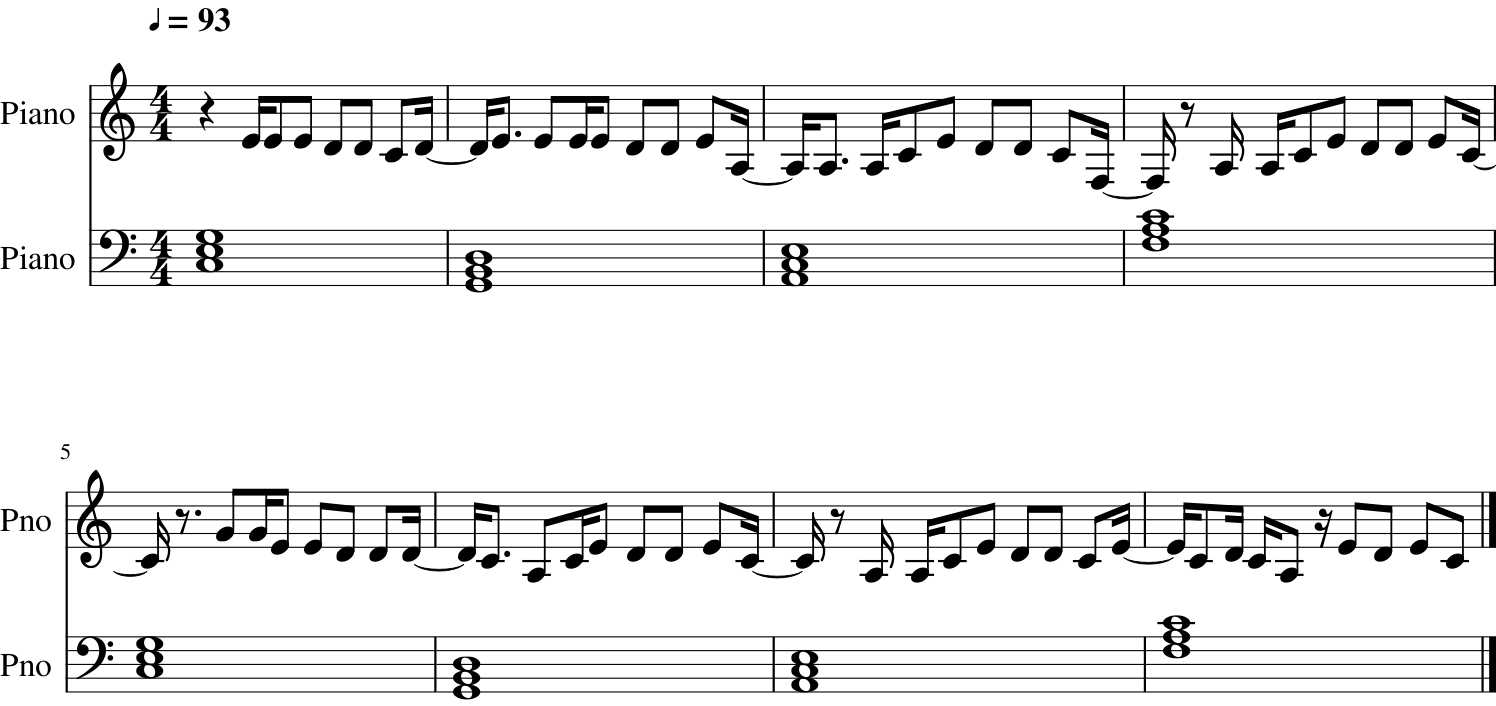

In [13]:
item.show()

In [14]:
item.play()

## Predict Mask

#### Regenerate durations

In [15]:
# duration mask
dur_item = item.mask_duration()

In [16]:
dur_pred = learn.predict_mask(dur_item, temperatures=(0.8,0.8), top_k=40, top_p=0.6)

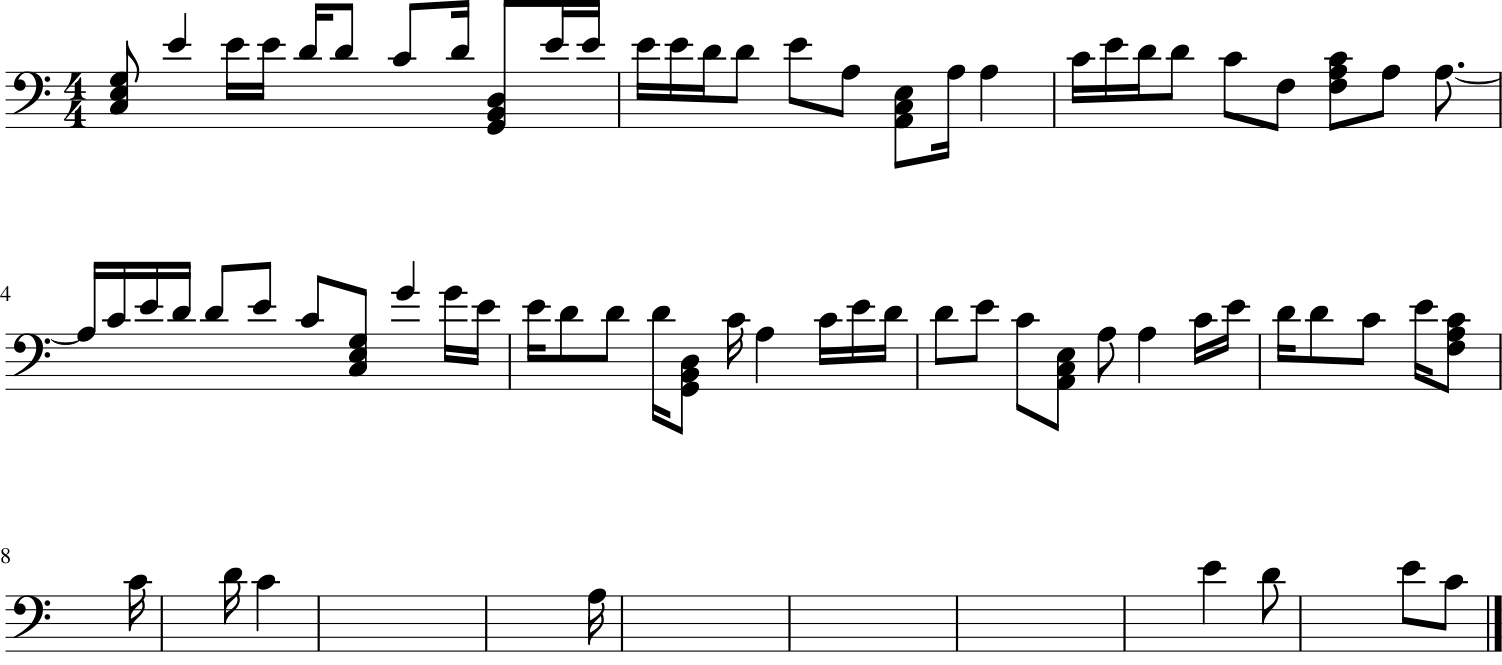

In [17]:
dur_pred.show()

#### Regenerate Notes

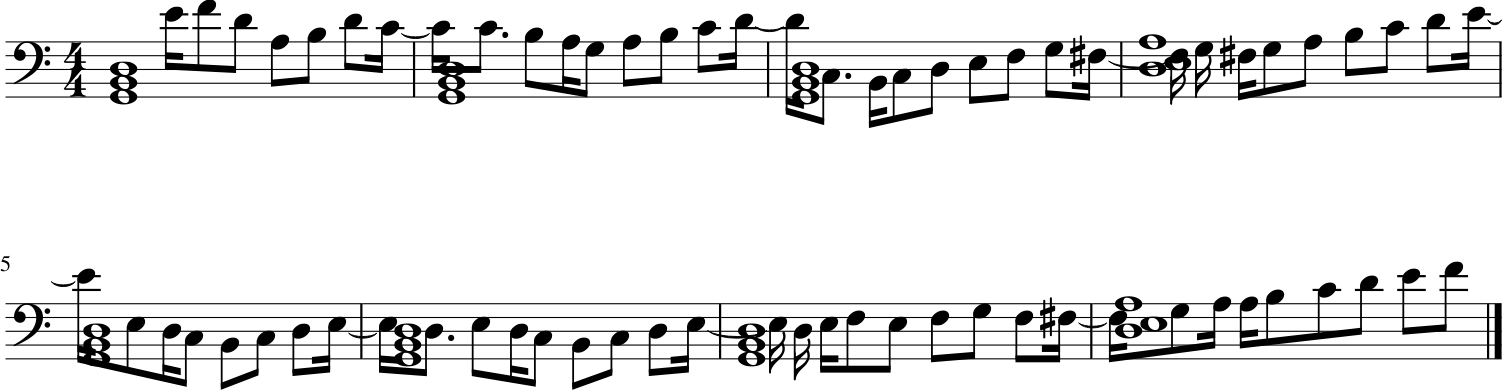

In [18]:
# Mask notes
# nr = vocab.stoi[SEP], vocab.stoi[NOTE_END]+1
note_item = item.mask_notes()
pred_note = learn.predict_mask(note_item)

pred_note.show()

In [19]:
pred_note.play()

In [20]:
out = mask_predict_from_midi(learn, file, predict_notes=True)

In [22]:
out.to_npenc()

array([[144,  16],
       [144,  16],
       [144,  16],
       [ -1,   4],
       ...,
       [ -1,   2],
       [ 48,   2],
       [ -1,   2],
       [ 46,   2]])

In [24]:
note_item

xxbos xxpad xxmask d16 xxmask d16 xxmask d16 xxsep d4 xxmask d1 xxsep d1 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d1 xxmask d16 xxmask d16 xxmask d16 xxsep d1 xxmask d3 xxsep d3 xxmask d2 xxsep d2 xxmask d1 xxsep d1 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d1 xxmask d16 xxmask d16 xxmask d16 xxsep d1 xxmask d3 xxsep d3 xxmask d1 xxsep d1 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d1 xxmask d16 xxmask d16 xxmask d16 xxsep d3 xxmask d1 xxsep d1 xxmask d1 xxsep d1 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d1 xxmask d16 xxmask d16 xxmask d16 xxsep d4 xxmask d2 xxsep d2 xxmask d1 xxsep d1 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d2 xxmask d2 xxsep d1 xxmask d16 xxmask d16 xxmask d16 xxsep d1 xxmask d3 xxse

In [23]:
out

xxbos xxpad d16 d16 d16 d16 d16 d16 xxsep d4 n66 d1 xxsep d1 n59 d2 xxsep d2 n64 d2 xxsep d2 n58 d2 xxsep d2 n59 d2 xxsep d2 n59 d2 xxsep d2 n63 d2 xxsep d1 n60 d16 n48 d16 n48 d16 xxsep d1 n60 d3 xxsep d3 n62 d2 xxsep d2 n60 d1 xxsep d1 n62 d2 xxsep d2 n60 d2 xxsep d2 n58 d2 xxsep d2 n57 d2 xxsep d2 n55 d2 xxsep d1 n51 d16 n51 d16 n51 d16 xxsep d1 n51 d3 xxsep d3 n51 d1 xxsep d1 n53 d2 xxsep d2 n51 d2 xxsep d2 n54 d2 xxsep d2 n55 d2 xxsep d2 n55 d2 xxsep d2 n54 d2 xxsep d1 n55 d16 n55 d16 n55 d16 xxsep d3 n53 d1 xxsep d1 n55 d1 xxsep d1 n56 d2 xxsep d2 n54 d2 xxsep d2 n55 d2 xxsep d2 n54 d2 xxsep d2 n46 d2 xxsep d2 n51 d2 xxsep d1 n51 d16 n46 d16 n46 d16 xxsep d4 n51 d2 xxsep d2 n53 d1 xxsep d1 n51 d2 xxsep d2 n51 d2 xxsep d2 n50 d2 xxsep d2 n51 d2 xxsep d2 n50 d2 xxsep d1 n50 d16 n46 d16 n46 d16 xxsep d1 n50 d3 xxsep d3 n50 d2 xxsep d2 n53 d1 xxsep d1 n50 d2 xxsep d2 n50 d2 xxsep d2 n51 d2 xxsep d2 n50 d2 xxsep d2 n50 d2 xxsep d1 n50 d16 n46 d16 n46 d16 xxsep d3 n50 d1 xxsep d1 n50 d

In [21]:
out.show()

IndexError: index 144 is out of bounds for axis 2 with size 128

## Prediction next word

In [ ]:
seed_len = 4 # 4 beats = 1 bar
seed = item.trim_to_beat(seed_len)

In [ ]:
seed.show()

In [ ]:
pred_nw = learn.predict_nw(seed, n_words=200)

In [ ]:
pred_nw.show()

In [ ]:
pred_nw.play()

Convenience function

In [ ]:
out = nw_predict_from_midi(learn, file, seed_len=seed_len, top_k=30, top_p=0.5)

In [ ]:
out.show()

## Predict Seq2Seq

In [ ]:
from src.numpy_encode import stream2npenc_parts

In [ ]:
multitrack_item = MultitrackItem.from_file(file, vocab)

In [ ]:
melody, chords = multitrack_item.melody, multitrack_item.chords

In [ ]:
multitrack_item.show()

In [ ]:
multitrack_item.play()

In [1]:
melody.show()

NameError: name 'melody' is not defined

In [ ]:
chords.show()

## Predict melody

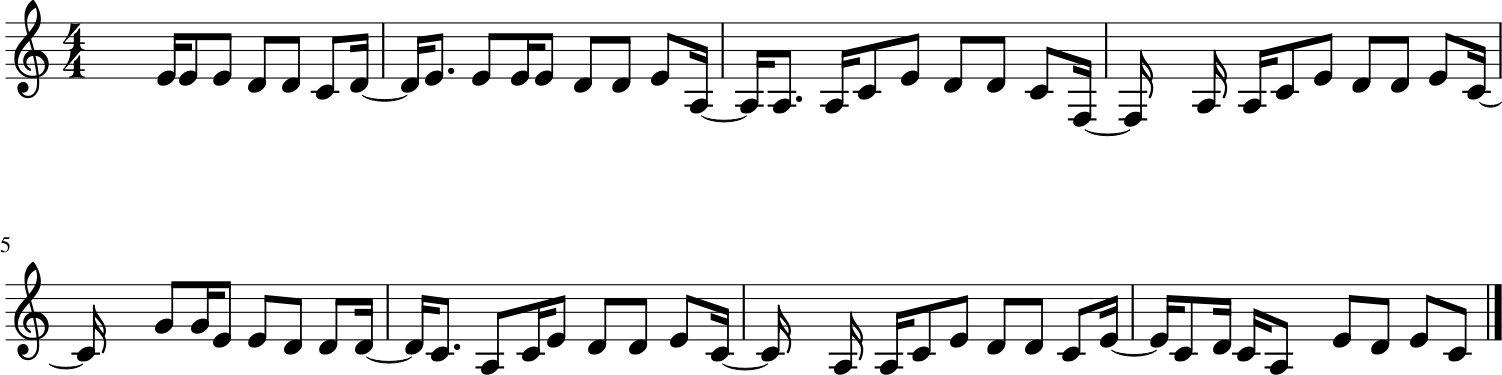

In [33]:
melody.show()

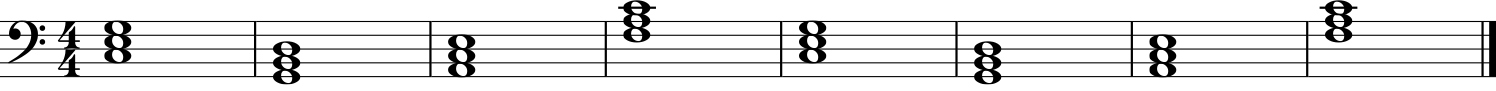

In [34]:
chords.show()

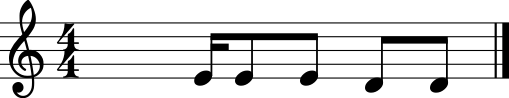

In [35]:
partial_melody = melody.trim_to_beat(3)
partial_melody.show()

In [36]:
learn.model = learn.model.cpu()

In [96]:
pred_melody = predict_s2s(learn, chords, partial_melody)

In [38]:
pred_melody.show()

NameError: name 'pred_melody' is not defined

In [98]:
pred_melody.play()

In [37]:
pred_melody = learn.predict_s2s(chords, partial_melody)

Predicted past counter-part length. Returning early


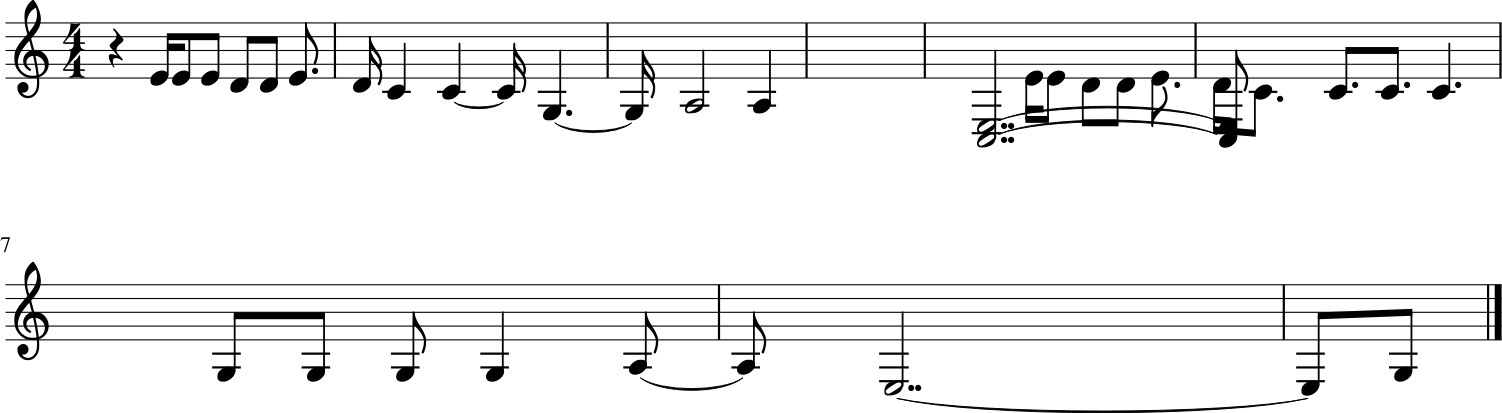

In [38]:
pred_melody.show()

In [39]:
combined = MultitrackItem(pred_melody, chords)

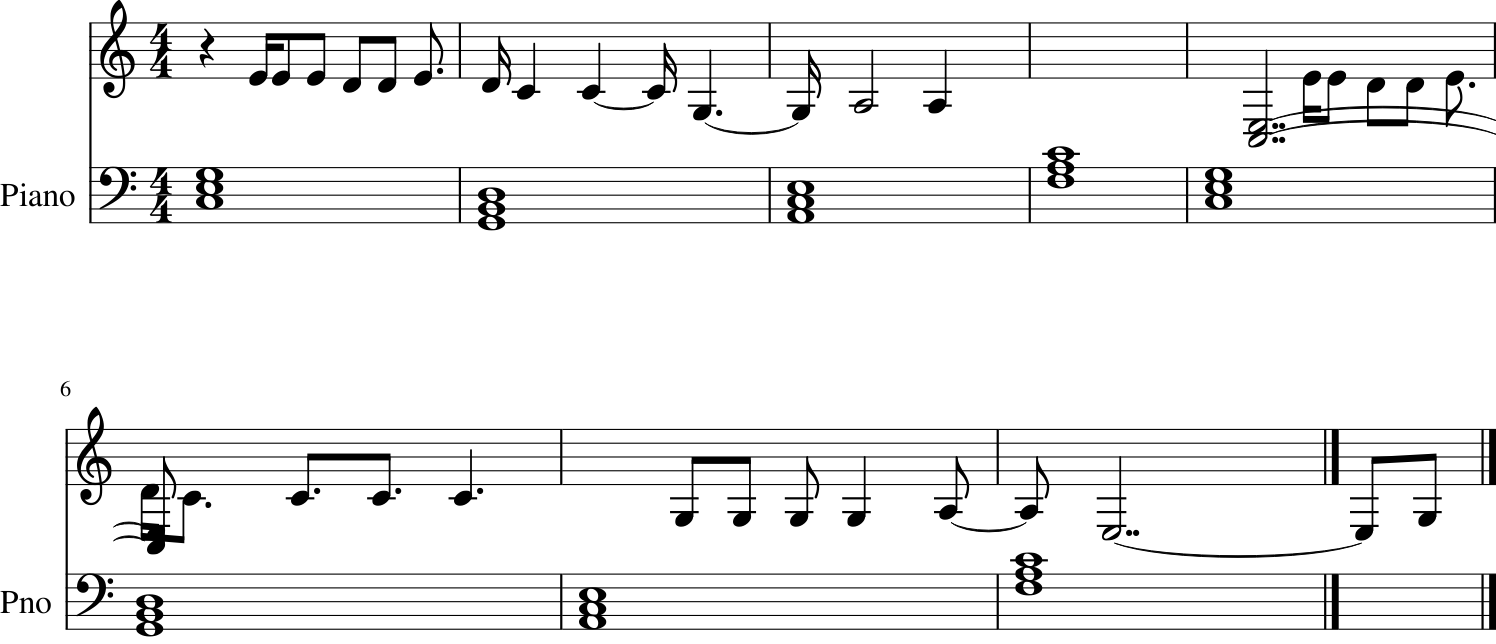

In [40]:
combined.show()

In [41]:
combined.play()

## Predict chords

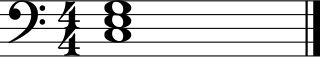

In [42]:
partial_chords = chords.trim_to_beat(3);
partial_chords.show()

In [43]:
pred_chord = learn.predict_s2s(input_item=melody, target_item=partial_chords)

Predicted past counter-part length. Returning early


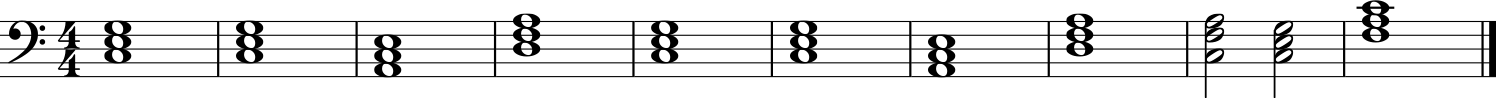

In [44]:
pred_chord.show()

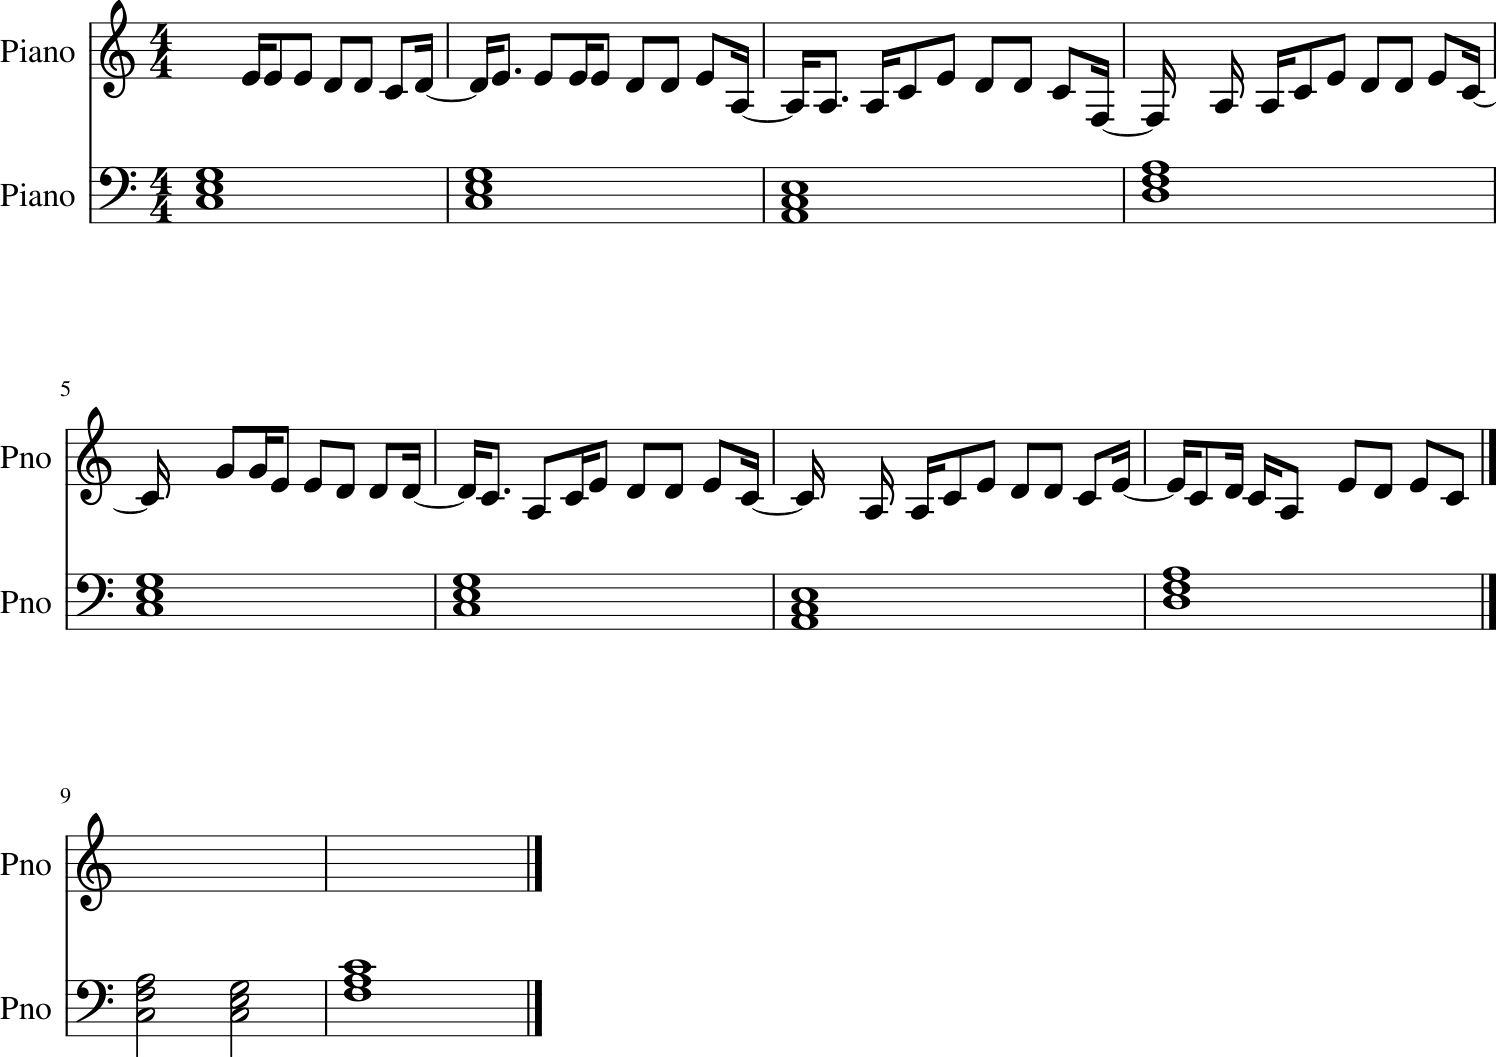

In [45]:
combined = MultitrackItem(melody, pred_chord)
combined.show()

Convenience Function

In [46]:
out = s2s_predict_from_midi(learn, file, seed_len=10)

Predicted past counter-part length. Returning early


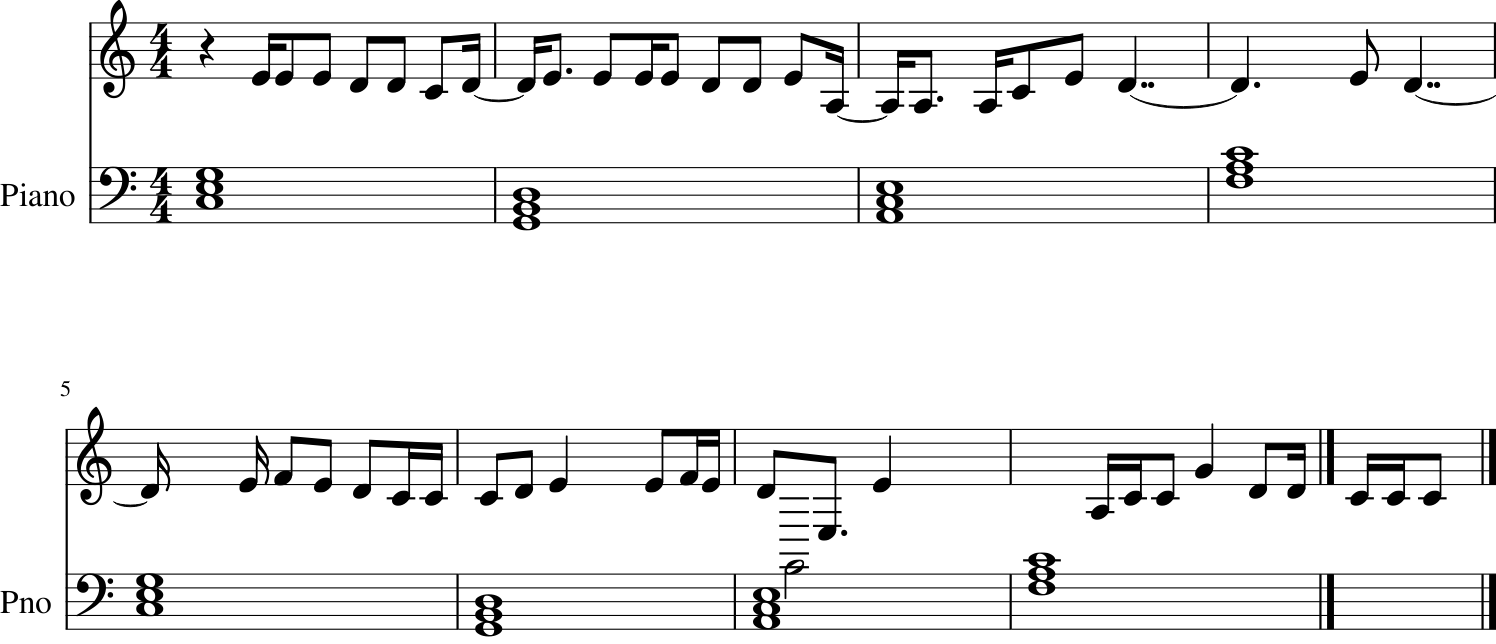

In [47]:
out.show()